In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
songs = pd.read_csv('data/songs.csv')

In [3]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12065 entries, 0 to 12064
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            12065 non-null  object 
 1   album             12065 non-null  object 
 2   release_date      12065 non-null  object 
 3   track_name        12065 non-null  object 
 4   track_id          12065 non-null  object 
 5   popularity        12065 non-null  int64  
 6   danceability      12065 non-null  float64
 7   energy            12065 non-null  float64
 8   key               12065 non-null  int64  
 9   loudness          12065 non-null  float64
 10  mode              12065 non-null  int64  
 11  speechiness       12065 non-null  float64
 12  instrumentalness  12065 non-null  float64
 13  liveness          12065 non-null  float64
 14  valence           12065 non-null  float64
 15  tempo             12065 non-null  float64
 16  duration_ms       12065 non-null  int64 

Drop duplicate tracks from the merged playlists and fill NaN values in the hit column in order to binarize the column

In [4]:
songs.drop_duplicates(subset=['track_name','artist'], inplace=True)
songs['hit'] = songs['hit'].fillna(int(0))
songs['hit'] = songs['hit'].astype(int)

Create new features that examine the day and month a track was released 

In [5]:
songs['release_date'] = pd.to_datetime(songs['release_date'])
songs['release_day'] = songs['release_date'].apply(lambda x: x.day)
songs['release_month'] = songs['release_date'].apply(lambda x: x.month)
songs['release_year'] = songs['release_date'].apply(lambda x: x.year)

In [6]:
#songs = songs[(songs['release_date'].dt.year >=2010)]

In [7]:
songs['hit'].value_counts()

0    8596
1    1889
Name: hit, dtype: int64

In [8]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10485 entries, 0 to 12064
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist            10485 non-null  object        
 1   album             10485 non-null  object        
 2   release_date      10485 non-null  datetime64[ns]
 3   track_name        10485 non-null  object        
 4   track_id          10485 non-null  object        
 5   popularity        10485 non-null  int64         
 6   danceability      10485 non-null  float64       
 7   energy            10485 non-null  float64       
 8   key               10485 non-null  int64         
 9   loudness          10485 non-null  float64       
 10  mode              10485 non-null  int64         
 11  speechiness       10485 non-null  float64       
 12  instrumentalness  10485 non-null  float64       
 13  liveness          10485 non-null  float64       
 14  valence           1048

In [9]:
songs.columns[6:18]

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [10]:
songs.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,10485.0,33.246447,28.154933,0.00000,0.0000,35.000000,59.00000,91.000
danceability,10485.0,0.607766,0.158946,0.07090,0.5020,0.616000,0.72300,0.980
energy,10485.0,0.705351,0.200242,0.00289,0.5830,0.741000,0.86600,0.999
key,10485.0,5.328946,3.602990,0.00000,2.0000,6.000000,8.00000,11.000
loudness,10485.0,-6.638438,3.283409,-39.76500,-7.9300,-5.889000,-4.48800,0.654
mode,10485.0,0.619456,0.485544,0.00000,0.0000,1.000000,1.00000,1.000
speechiness,10485.0,0.088216,0.088208,0.02190,0.0368,0.053000,0.09640,0.940
instrumentalness,10485.0,0.089042,0.225691,0.00000,0.0000,0.000036,0.00857,0.992
liveness,10485.0,0.193085,0.158122,0.01200,0.0929,0.128000,0.25400,0.984
valence,10485.0,0.511507,0.240226,0.02620,0.3280,0.508000,0.70100,0.990


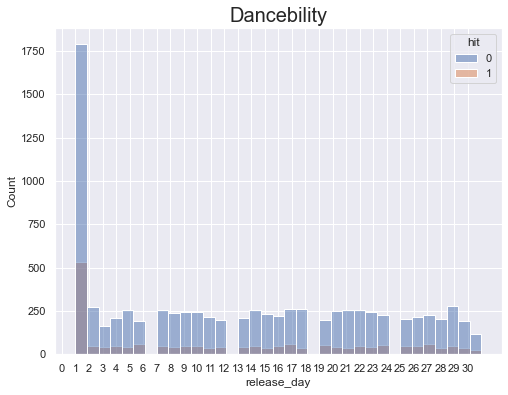

In [28]:
plt.figure(figsize=(8,6))
sns.histplot(songs, x='release_day', hue='hit',bins=35)
plt.xticks(np.arange(0, 31, 1))
plt.title('Dancebility', fontsize=20);

<AxesSubplot:xlabel='hit', ylabel='duration_ms'>

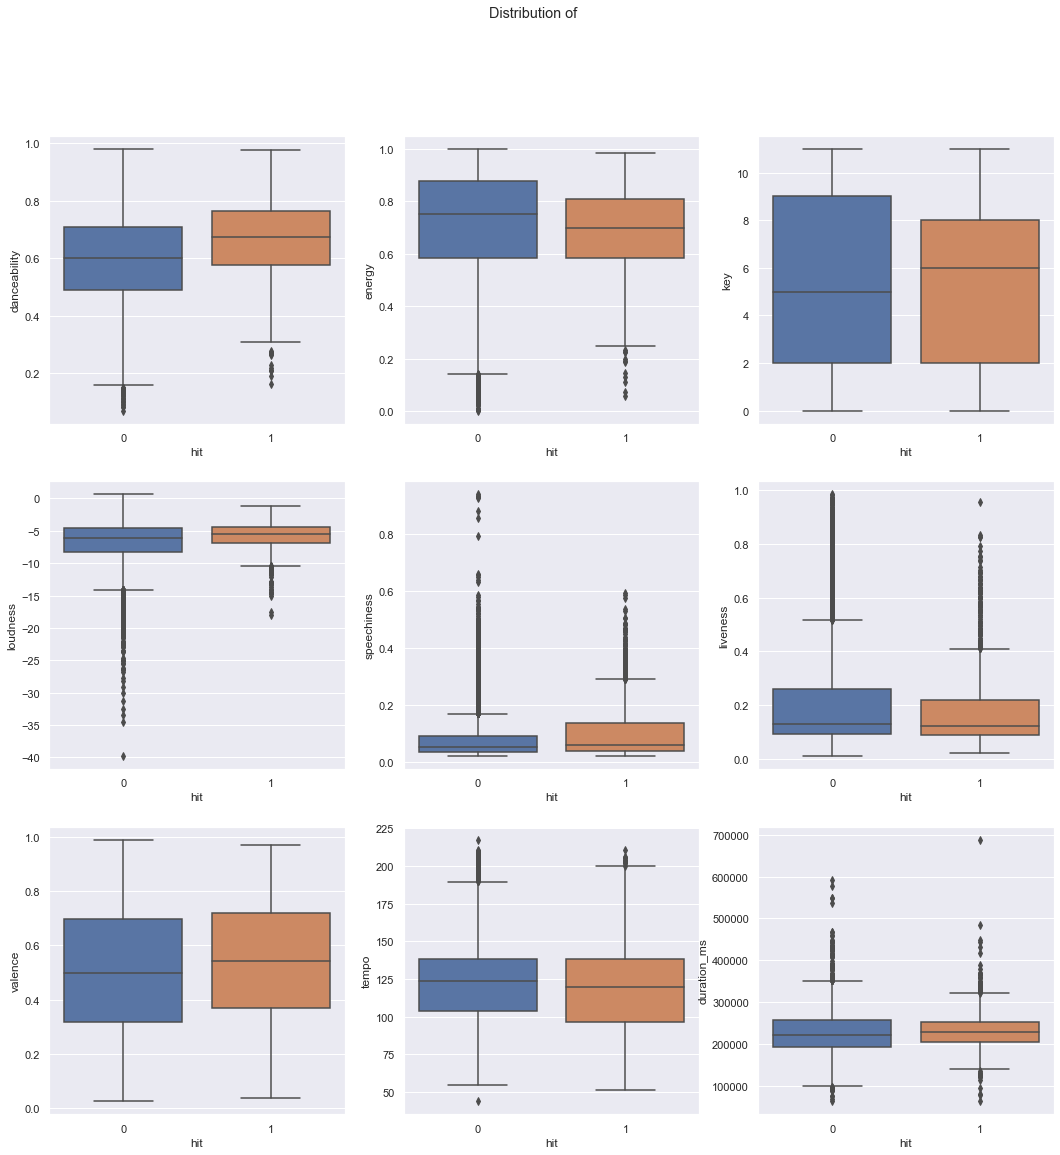

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

fig.suptitle('Distribution of ')

sns.boxplot(ax=axes[0, 0], data=songs, x='hit', y='danceability')
sns.boxplot(ax=axes[0, 1], data=songs, x='hit', y='energy')
sns.boxplot(ax=axes[0, 2], data=songs, x='hit', y='key')
sns.boxplot(ax=axes[1, 0], data=songs, x='hit', y='loudness')
#sns.boxplot(ax=axes[1, 1], data=songs, x='hit', y='mode')
sns.boxplot(ax=axes[1, 1], data=songs, x='hit', y='speechiness')
sns.boxplot(ax=axes[1, 2], data=songs, x='hit', y='liveness')
sns.boxplot(ax=axes[2, 0], data=songs, x='hit', y='valence')
sns.boxplot(ax=axes[2, 1], data=songs, x='hit', y='tempo')
sns.boxplot(ax=axes[2, 2], data=songs, x='hit', y='duration_ms')
#sns.boxplot(ax=axes[3, 0], data=songs, x='hit', y='time_signature')

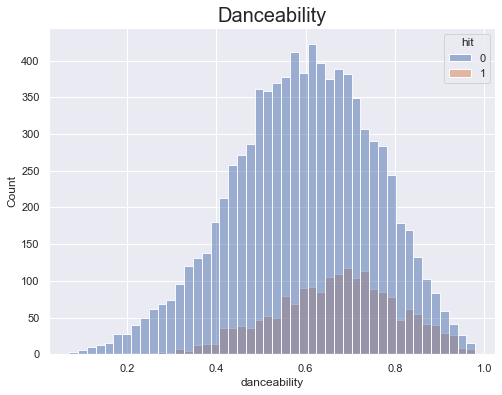

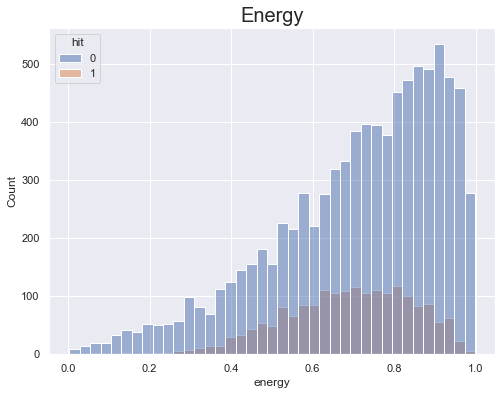

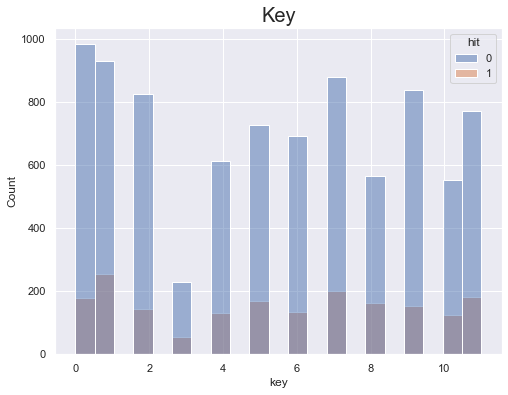

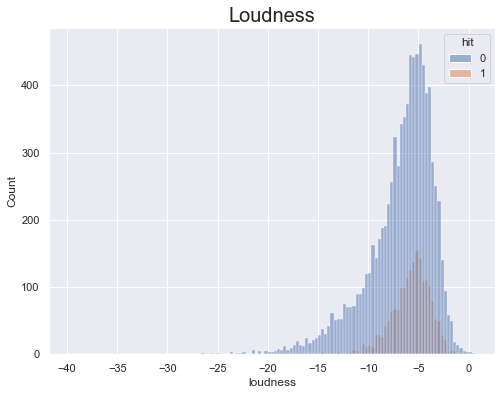

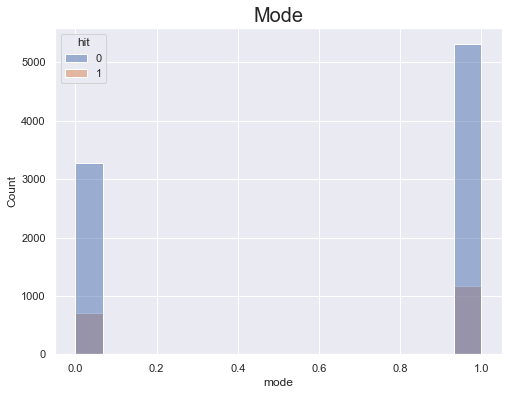

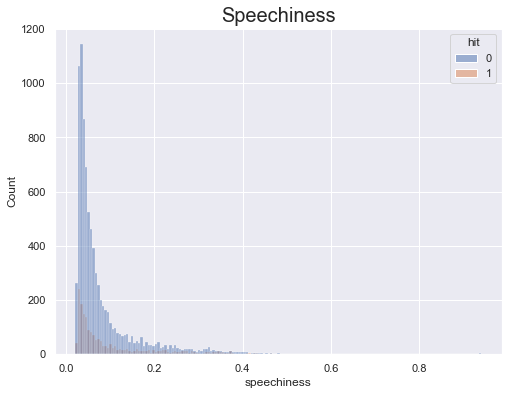

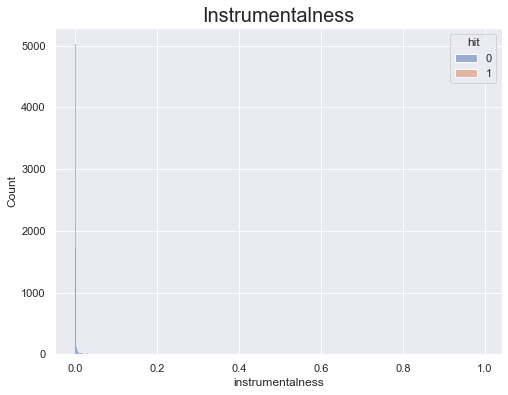

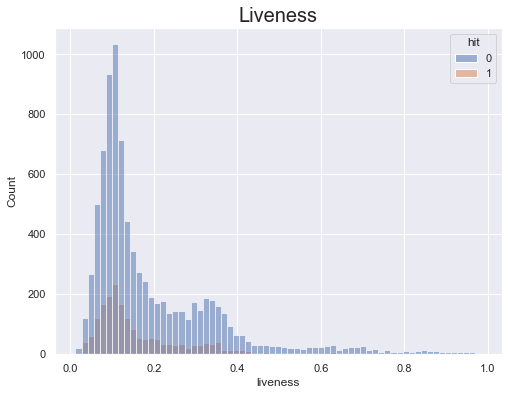

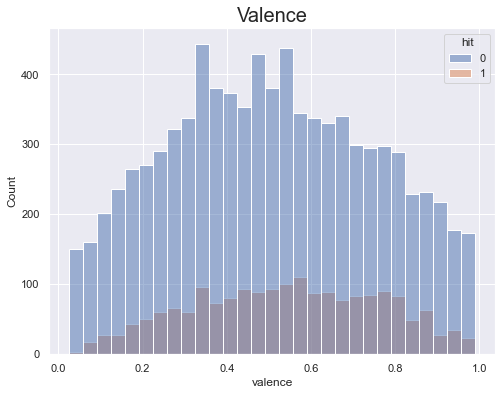

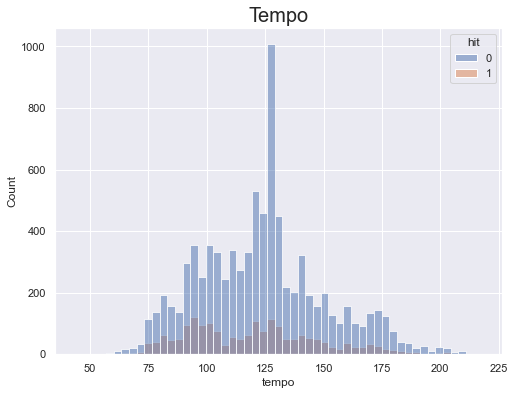

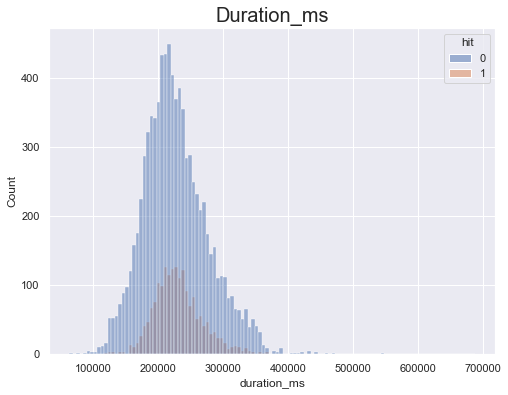

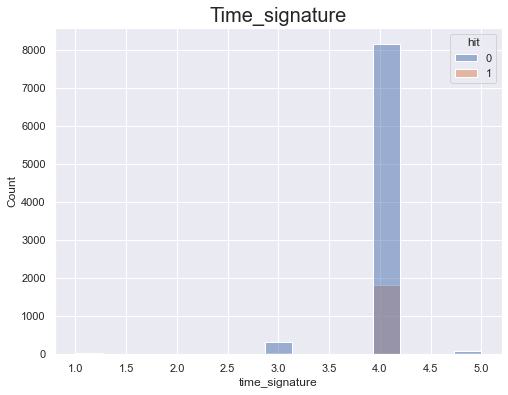

In [11]:
for col in songs.columns[6:18]:
    plt.figure(figsize=(8,6))
    sns.histplot(data=songs, x=col, hue='hit')
    plt.title(f'{col.capitalize()}', fontsize=20)
    plt.show()

In [12]:
audio_features=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','time_signature']

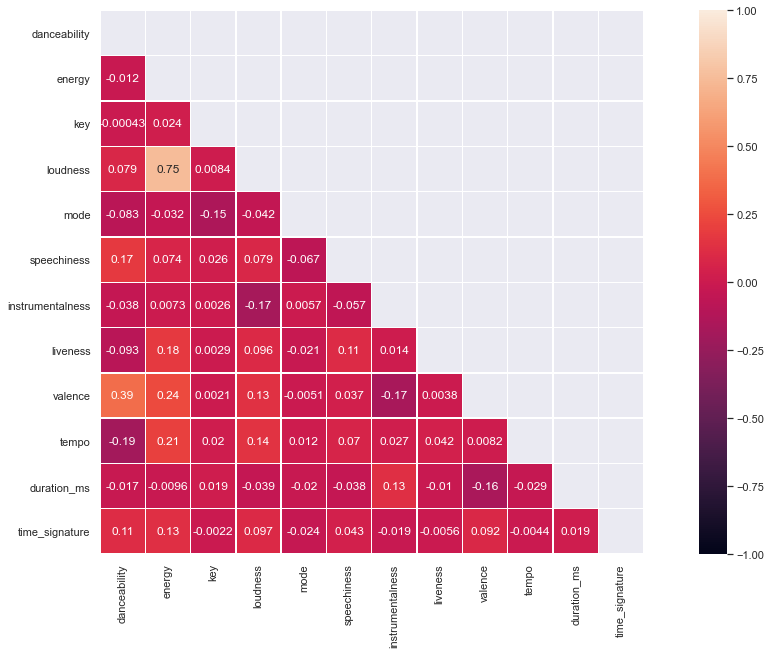

In [13]:
plt.figure(figsize=(20,10))
corr = songs[audio_features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, vmin=-1, vmax=1, square=True, linewidths=.5, mask=mask, annot=True);

In [14]:
songs[['artist','track_name','release_date','popularity','hit']].sort_values('popularity', ascending=False).head(20)

,artist,track_name,release_date,popularity,hit
1984,Harry Styles,Watermelon Sugar,2019-12-13,91,1
1439,The Neighbourhood,Sweater Weather,2013-04-19,89,1
1969,DaBaby,ROCKSTAR (feat. Roddy Ricch),2020-04-17,89,1
1891,Lewis Capaldi,Someone You Loved,2019-05-17,89,1
1926,Post Malone,Circles,2019-09-06,88,1
1988,Cardi B,WAP (feat. Megan Thee Stallion),2020-08-07,88,1
9802,Billie Eilish,lovely (with Khalid),2018-04-19,88,0
1732,Travis Scott,goosebumps,2016-09-16,87,1
1983,SAINt JHN,Roses - Imanbek Remix,2019-10-09,87,1
2013,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),2020-07-03,87,1


In [15]:
songs.to_csv('data/songs_clean.csv', index=False)